Upload your WhatsApp chat .txt file (exported without media)...


Saving WhatsApp Chat with CMPN B batch 3.txt to WhatsApp Chat with CMPN B batch 3 (2).txt
Uploaded: WhatsApp Chat with CMPN B batch 3 (2).txt
Total messages parsed: 972


,date,time,message
0,9/2/24,2:10 PM,Messages and calls are end-to-end encrypted. O...
1,7/10/24,2:54 PM,"Jyotsna Cmpn VIT created group ""CMPN B batch 3"""
2,9/2/24,2:10 PM,You joined using this group's invite link
3,9/2/24,2:10 PM,Samruddhi joined using a group link.
4,9/2/24,2:10 PM,Unnati Cmpn VIT joined using a group link.


/tmp/ipython-input-2726739179.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], dayfirst=True)


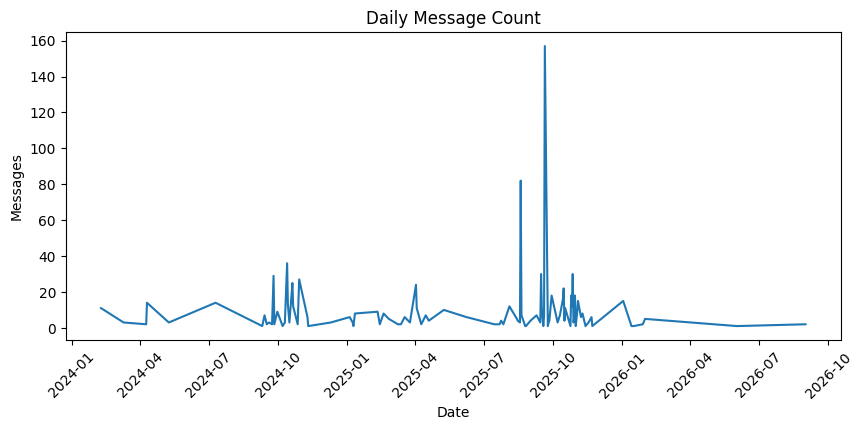

Top senders:
 sender
Aryan Kulkarni      290
Jyotsna Cmpn VIT    203
Vismaya Cmpn         75
+91 97692 94458      65
+91 97690 62368      46
Sneha Cmpn Vit       45
Samruddhi            36
+91 91672 03759      30
Prerna VIT           29
+91 81040 09566      24
Name: count, dtype: int64
Most common words:
        word  count
0     aryan    296
1      cmpn    280
2   jyotsna    211
3       hai    199
4   vismaya     75
5        ka     55
6       kya     54
7     sneha     49
8      nahi     42
9       nhi     42
10       ko     40
11  message     39
12      bhi     39
13     bhai     36
14      was     34
15       na     33
16   prerna     31
17      toh     30
18       se     30
19       hi     29


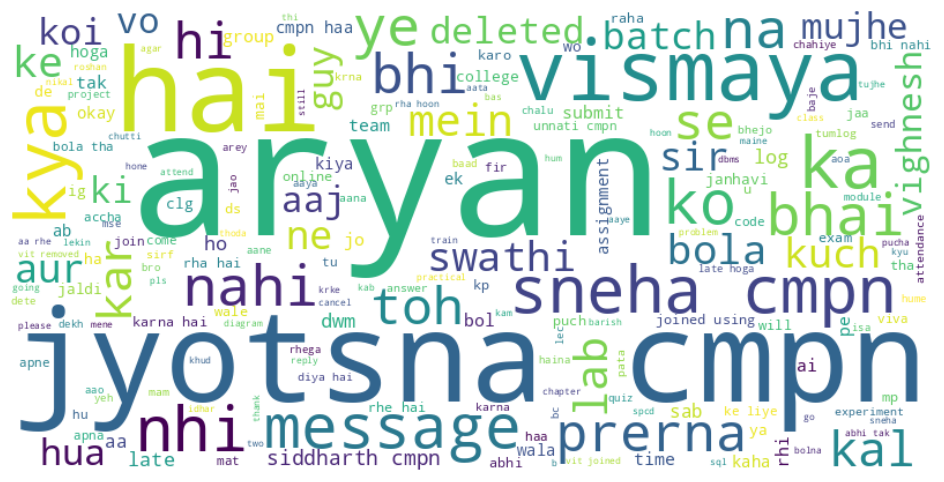

Top emojis:
 [('😂', 25), ('😭', 21), ('🤣', 9), ('🥳', 8), ('😔', 4), ('😌', 4), ('👏', 3), ('🏻', 3), ('🫡', 3), ('🫠', 2)]


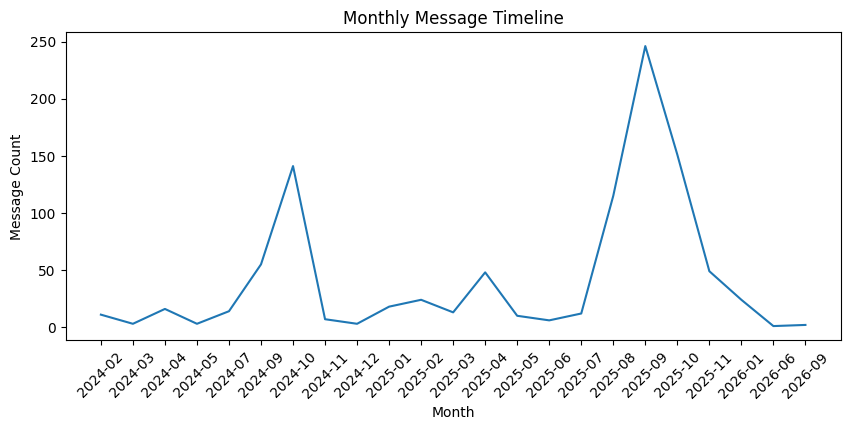

In [4]:
# 📌 Install required libraries
!pip install wordcloud emoji

# ---------------------------------------
# 🧠 Import Libraries
# ---------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import emoji
import re
from collections import Counter

# ---------------------------------------
# 📥 Upload WhatsApp Chat File
# ---------------------------------------
from google.colab import files

print("Upload your WhatsApp chat .txt file (exported without media)...")
uploaded = files.upload()

chat_file = list(uploaded.keys())[0]
print("Uploaded:", chat_file)

# ---------------------------------------
# 🔍 Read and Clean the Chat
# ---------------------------------------
with open(chat_file, "r", encoding="utf-8") as f:
    content = f.read().split("\n")

messages = []

for line in content:
    # Updated pattern to handle AM/PM and non-breaking space (\u202f)
    match = re.match(r"(\d{1,2}/\d{1,2}/\d{2,4}),\s(\d{1,2}:\d{2})\u202f(AM|PM)\s-\s(.*)", line)
    if match:
        date, time, ampm, msg = match.groups()
        # Combine time and ampm for better datetime parsing later if needed
        full_time = f"{time} {ampm}"
        messages.append({"date": date, "time": full_time, "message": msg})

df = pd.DataFrame(messages)
print("Total messages parsed:", df.shape[0])
display(df.head())

# ---------------------------------------
# 📈 Message Frequency by Day
# ---------------------------------------
df["date"] = pd.to_datetime(df["date"], dayfirst=True)

by_date = df.groupby(df["date"].dt.date).count()["message"]
plt.figure(figsize=(10,4))
plt.plot(by_date.index, by_date.values)
plt.title("Daily Message Count")
plt.xlabel("Date")
plt.ylabel("Messages")
plt.xticks(rotation=45)
plt.show()

# ---------------------------------------
# 💬 Top Senders (if group chat)
# ---------------------------------------
df["sender"] = df["message"].apply(lambda x: x.split(": ")[0] if ": " in x else "Unknown")
top_senders = df["sender"].value_counts().head(10)
print("Top senders:\n", top_senders)

# ---------------------------------------
# 🔡 Most Common Words (excluding stop words)
# ---------------------------------------
stop_words = set(["the","to","and","is","in","of","you","I'll","that","this"])
all_words = " ".join(df["message"]).lower().split()
filtered_words = [w for w in all_words if w not in stop_words and w.isalpha()]

common_words = Counter(filtered_words).most_common(20)
common_df = pd.DataFrame(common_words, columns=["word", "count"])
print("Most common words:\n", common_df)

# ---------------------------------------
# 🧠 WordCloud Visualization
# ---------------------------------------
wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# ---------------------------------------
# 😊 Emoji Analysis
# ---------------------------------------
all_emojis = []
for msg in df["message"]:
    all_emojis += [c for c in msg if emoji.is_emoji(c)]

emoji_counts = Counter(all_emojis).most_common(10)
print("Top emojis:\n", emoji_counts)

# ---------------------------------------
# 📆 Timeline: Messages over Time
# ---------------------------------------
timeline = df.groupby(df["date"].dt.strftime('%Y-%m'))["message"].count()
plt.figure(figsize=(10,4))
plt.plot(timeline.index, timeline.values)
plt.title("Monthly Message Timeline")
plt.xlabel("Month")
plt.ylabel("Message Count")
plt.xticks(rotation=45)
plt.show()